In [81]:
import sys
!{sys.executable} -m pip install geopandas



In [82]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.interpolate import interp1d
import seaborn.objects as so
from scipy.stats import chi2_contingency
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [83]:
cancellations_hb_fp = os.path.join(os.getcwd(), "datasets", "cancellations_by_hb.csv")
cancellations_hb = pd.read_csv(cancellations_hb_fp)
#Population reference: https://www.opendata.nhs.scot/dataset/population-estimates
population_fp = os.path.join(os.getcwd(), "datasets", "healthboard_population2021.csv")
population = pd.read_csv(population_fp)

hb_names_fp = os.path.join(os.getcwd(), "datasets", "hb_names.xlsx")
hb_names = pd.read_excel(hb_names_fp)

cancellations_hb['Year'] = cancellations_hb['Month'].astype(str).str[:4].astype(int)
cancellations_hb
#Health_boards boundaries dataset: https://www.spatialdata.gov.scot/geonetwork/srv/eng/catalog.search;%20%20%20%20%20%20%20%20jsessionid=6DD0344842102BEFBD8BC6%20%20%20%20%20%20%20%2080599A643B#/metadata/f12c3826-4b4b-40e6-bf4f-77b9ed01dc14
hb_geo_hp = os.path.join(os.getcwd(), "datasets", "SG_NHS_HealthBoards_2019","SG_NHS_HealthBoards_2019.shp")
hb_geo = gpd.read_file(hb_geo_hp)

In [84]:
relevantcancel = cancellations_hb[["HBT","TotalCancelled"]]
cancellations_hb

,_id,Month,HBT,TotalOperations,TotalOperationsQF,TotalCancelled,TotalCancelledQF,CancelledByPatientReason,CancelledByPatientReasonQF,ClinicalReason,ClinicalReasonQF,NonClinicalCapacityReason,NonClinicalCapacityReasonQF,OtherReason,OtherReasonQF,Year
0,1,201505,S08000015,1861,NaN,178,NaN,52,NaN,70,NaN,27,NaN,29,NaN,2015
1,2,201505,S08000016,457,NaN,66,NaN,11,NaN,10,NaN,45,NaN,0,NaN,2015
2,3,201505,S08000017,1433,NaN,113,NaN,33,NaN,56,NaN,15,NaN,9,NaN,2015
3,4,201505,S08000019,1250,NaN,91,NaN,40,NaN,34,NaN,10,NaN,7,NaN,2015
4,5,201505,S08000020,3310,NaN,264,NaN,110,NaN,71,NaN,76,NaN,7,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,1571,202401,S08000029,1334,NaN,64,NaN,21,NaN,27,NaN,16,NaN,0,NaN,2024
1571,1572,202401,S08000030,1550,NaN,131,NaN,46,NaN,47,NaN,5,NaN,33,NaN,2024
1572,1573,202401,S08000031,5121,NaN,452,NaN,135,NaN,144,NaN,120,NaN,53,NaN,2024
1573,1574,202401,S08000032,1930,NaN,167,NaN,93,NaN,43,NaN,27,NaN,4,NaN,2024


In [85]:
relevantcancel = relevantcancel.groupby("HBT").sum()
relevantcancel.rename(columns={"HBT":"Health Board Code"},inplace=True)
hb_names.rename(columns={"HB21CD":"HBT","HB21NM":"HBNames"},inplace=True)
hb_names

,HBT,HB21CDS,HBNames
0,S08000015,SA9,Ayrshire and Arran
1,S08000016,SB9,Borders
2,S08000017,SY9,Dumfries and Galloway
3,S08000019,SV9,Forth Valley
4,S08000020,SN9,Grampian
5,S08000022,SH9,Highland
6,S08000024,SS9,Lothian
7,S08000025,SR9,Orkney
8,S08000026,SZ9,Shetland
9,S08000028,SW9,Western Isles


In [86]:
merged_names = pd.merge(relevantcancel, hb_names, on = "HBT")
merged_names


,HBT,TotalCancelled,HB21CDS,HBNames
0,S08000015,15721,SA9,Ayrshire and Arran
1,S08000016,3477,SB9,Borders
2,S08000017,12470,SY9,Dumfries and Galloway
3,S08000019,9021,SV9,Forth Valley
4,S08000020,24103,SN9,Grampian
5,S08000022,13865,SH9,Highland
6,S08000024,48812,SS9,Lothian
7,S08000025,1976,SR9,Orkney
8,S08000026,1119,SZ9,Shetland
9,S08000028,922,SW9,Western Isles


In [87]:
names = merged_names[["HBNames","TotalCancelled"]] 
names.reset_index(drop=True, inplace=True)
names

,HBNames,TotalCancelled
0,Ayrshire and Arran,15721
1,Borders,3477
2,Dumfries and Galloway,12470
3,Forth Valley,9021
4,Grampian,24103
5,Highland,13865
6,Lothian,48812
7,Orkney,1976
8,Shetland,1119
9,Western Isles,922


In [88]:
relevantcancel

,TotalCancelled
HBT,
S08000015,15721
S08000016,3477
S08000017,12470
S08000019,9021
S08000020,24103
S08000022,13865
S08000024,48812
S08000025,1976
S08000026,1119


In [89]:
def get_initials(name):
    initials = ''.join(word[0].upper() for word in name.split())
    return initials
names['Initials'] = names['HBNames'].apply(get_initials)
names

/tmp/ipykernel_141/2193724132.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names['Initials'] = names['HBNames'].apply(get_initials)


,HBNames,TotalCancelled,Initials
0,Ayrshire and Arran,15721,AAA
1,Borders,3477,B
2,Dumfries and Galloway,12470,DAG
3,Forth Valley,9021,FV
4,Grampian,24103,G
5,Highland,13865,H
6,Lothian,48812,L
7,Orkney,1976,O
8,Shetland,1119,S
9,Western Isles,922,WI


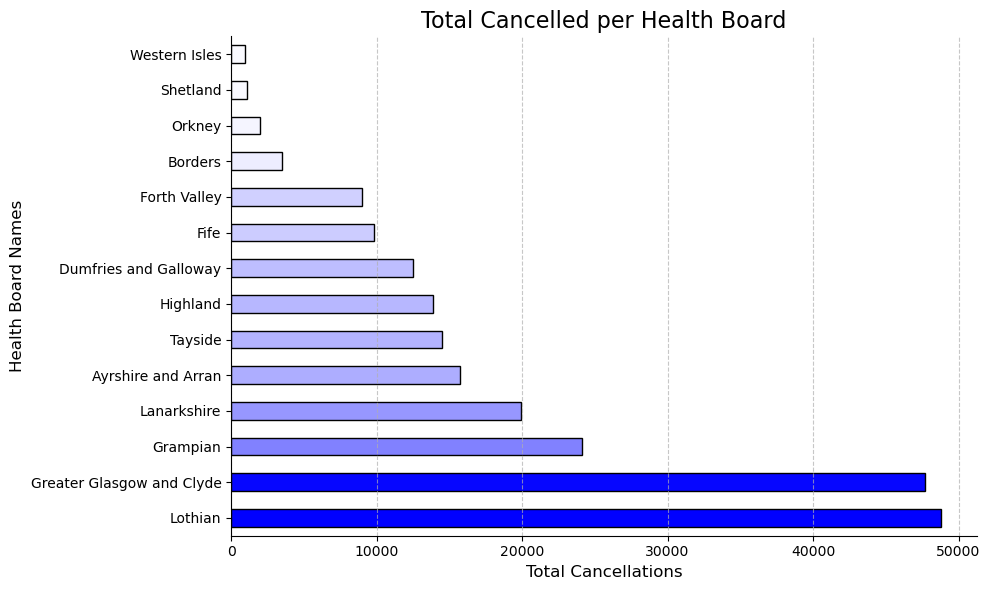

In [90]:
names_sorted = names.sort_values(by='TotalCancelled')

base_color = (0, 0, 1, 0.3)  

max_value = names_sorted['TotalCancelled'].max()
colors = [(base_color[0], base_color[1], base_color[2], row['TotalCancelled'] / max_value) for index, row in names_sorted.iterrows()]

# Plotting the horizontal bar chart with specified colors and black outline
names_sorted.plot(x="HBNames", y="TotalCancelled", kind="barh", figsize=(10, 6), color=colors, legend=False, edgecolor='black')

# Adding title and labels
plt.title('Total Cancelled per Health Board', fontsize=16)
plt.xlabel('Total Cancellations', fontsize=12)
plt.ylabel('Health Board Names', fontsize=12)

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust bar width
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.gca().spines['right'].set_visible(False)  # Remove right spine
plt.gca().spines['top'].set_visible(False)  # Remove top spine
plt.tight_layout()
plt.savefig('TotalCancellationsHealthBoard.pdf')
# Showing the plot
plt.show()

In [91]:
names[["HBNames","Initials"]]

,HBNames,Initials
0,Ayrshire and Arran,AAA
1,Borders,B
2,Dumfries and Galloway,DAG
3,Forth Valley,FV
4,Grampian,G
5,Highland,H
6,Lothian,L
7,Orkney,O
8,Shetland,S
9,Western Isles,WI


In [92]:
#now compare between population and number of cancellations
population


,_id,Year,HB,HBQF,Sex,SexQF,AllAges,Age0,Age1,Age2,...,Age81,Age82,Age83,Age84,Age85,Age86,Age87,Age88,Age89,Age90plus
0,1,1981,S92000003,d,All,d,5180200,68529,66723,64065,...,19381,15848,13647,11778,10157,8229,6795,5579,4339,13571
1,2,1981,S92000003,d,Female,NaN,2685340,33266,32581,30995,...,13650,11349,10014,8759,7686,6187,5156,4329,3371,10859
2,3,1981,S92000003,d,Male,NaN,2494860,35263,34142,33070,...,5731,4499,3633,3019,2471,2042,1639,1250,968,2712
3,4,1981,S08000015,NaN,All,d,377854,5036,4863,4764,...,1334,1084,1000,807,693,539,432,378,276,821
4,5,1981,S08000015,NaN,Female,NaN,196774,2446,2378,2264,...,928,774,746,597,496,401,304,297,213,627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,1841,2021,S08000031,NaN,Female,NaN,607878,5062,5350,5707,...,3426,3370,3096,2903,2622,2455,2206,1877,1706,6428
1841,1842,2021,S08000031,NaN,Male,NaN,577162,5380,5645,5904,...,2232,2199,1995,1849,1547,1385,1099,948,844,2673
1842,1843,2021,S08000032,NaN,All,d,664030,6232,6402,6770,...,3501,3325,3129,2724,2547,2106,1772,1599,1299,4398
1843,1844,2021,S08000032,NaN,Female,NaN,342339,3020,3142,3340,...,2045,1962,1806,1687,1583,1359,1122,986,837,3063


In [93]:
population.rename(columns={"HB":"HBT"},inplace=True)
population = population[(population['Sex'] == 'All')]
relpop = population[["HBT","AllAges","Year"]]
relpop


,HBT,AllAges,Year
0,S92000003,5180200,1981
3,S08000015,377854,1981
6,S08000016,101256,1981
9,S08000017,145502,1981
12,S08000019,273625,1981
...,...,...,...
1830,S08000028,26640,2021
1833,S08000029,374730,2021
1836,S08000030,417650,2021
1839,S08000031,1185040,2021


In [94]:
filterelpop = relpop[(relpop['Year'] >= 2015) & (relpop['Year'] <= 2021)]
filterelpop
filterelpop = filterelpop.groupby(["HBT","Year"]).sum()
filterelpop

AllAges
HBT       Year         
S08000015 2015   370590
          2016   370560
          2017   370410
          2018   369670
          2019   369360
...                 ...
S92000003 2017  5424800
          2018  5438100
          2019  5463300
          2020  5466000
          2021  5479900

[105 rows x 1 columns]

In [95]:
filterelpop

AllAges
HBT       Year         
S08000015 2015   370590
          2016   370560
          2017   370410
          2018   369670
          2019   369360
...                 ...
S92000003 2017  5424800
          2018  5438100
          2019  5463300
          2020  5466000
          2021  5479900

[105 rows x 1 columns]

In [96]:
cancellations_hb

,_id,Month,HBT,TotalOperations,TotalOperationsQF,TotalCancelled,TotalCancelledQF,CancelledByPatientReason,CancelledByPatientReasonQF,ClinicalReason,ClinicalReasonQF,NonClinicalCapacityReason,NonClinicalCapacityReasonQF,OtherReason,OtherReasonQF,Year
0,1,201505,S08000015,1861,NaN,178,NaN,52,NaN,70,NaN,27,NaN,29,NaN,2015
1,2,201505,S08000016,457,NaN,66,NaN,11,NaN,10,NaN,45,NaN,0,NaN,2015
2,3,201505,S08000017,1433,NaN,113,NaN,33,NaN,56,NaN,15,NaN,9,NaN,2015
3,4,201505,S08000019,1250,NaN,91,NaN,40,NaN,34,NaN,10,NaN,7,NaN,2015
4,5,201505,S08000020,3310,NaN,264,NaN,110,NaN,71,NaN,76,NaN,7,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,1571,202401,S08000029,1334,NaN,64,NaN,21,NaN,27,NaN,16,NaN,0,NaN,2024
1571,1572,202401,S08000030,1550,NaN,131,NaN,46,NaN,47,NaN,5,NaN,33,NaN,2024
1572,1573,202401,S08000031,5121,NaN,452,NaN,135,NaN,144,NaN,120,NaN,53,NaN,2024
1573,1574,202401,S08000032,1930,NaN,167,NaN,93,NaN,43,NaN,27,NaN,4,NaN,2024


In [97]:
cancellations_hb
cancelyr = cancellations_hb[["HBT","TotalCancelled","Year"]]
cancelyr = cancelyr.groupby(["HBT","Year"]).sum()
cancelyr

TotalCancelled
HBT       Year                
S08000015 2015            1631
          2016            2342
          2017            2096
          2018            2051
          2019            2405
...                        ...
SB0801    2020             633
          2021            1251
          2022            1644
          2023            1527
          2024             162

[150 rows x 1 columns]

In [98]:
merged_df = pd.merge(cancelyr, filterelpop, on=['HBT','Year'], how='inner')
merged_df

TotalCancelled  AllAges
HBT       Year                         
S08000015 2015            1631   370590
          2016            2342   370560
          2017            2096   370410
          2018            2051   369670
          2019            2405   369360
...                        ...      ...
S08000032 2017            2880   658130
          2018            2892   659200
          2019            2978   661900
          2020            1221   661960
          2021            1218   664030

[98 rows x 2 columns]

In [99]:

merged_df['Popu/can ratio'] = merged_df["TotalCancelled"]/merged_df["AllAges"].round(0)
merged_df['Popu/can ratio'] = merged_df['Popu/can ratio']
merged_df

TotalCancelled  AllAges  Popu/can ratio
HBT       Year                                         
S08000015 2015            1631   370590        0.004401
          2016            2342   370560        0.006320
          2017            2096   370410        0.005659
          2018            2051   369670        0.005548
          2019            2405   369360        0.006511
...                        ...      ...             ...
S08000032 2017            2880   658130        0.004376
          2018            2892   659200        0.004387
          2019            2978   661900        0.004499
          2020            1221   661960        0.001845
          2021            1218   664030        0.001834

[98 rows x 3 columns]

In [100]:
merged_sum = merged_df.groupby("HBT").sum()
merged_sum

,TotalCancelled,AllAges,Popu/can ratio
HBT,,,
S08000015,12485,2587270,0.033761
S08000016,2769,805620,0.024080
S08000017,9042,1043120,0.060663
S08000019,6854,2137060,0.022447
S08000020,19084,4104630,0.032547
S08000022,11200,2253530,0.034802
S08000024,38533,6271400,0.043124
S08000025,1243,154920,0.056123
S08000026,760,161200,0.032999


In [101]:
merged_namessum = pd.merge(merged_sum, hb_names, on = "HBT")
merged_namessum = merged_namessum[["HBNames","Popu/can ratio"]] 
merged_namessum = merged_namessum.replace("Lothian", "Lothian O")
merged_namessum = merged_namessum.replace("Lanarkshire","Lanarkshire A")
merged_namessum['Initials'] = merged_namessum['HBNames'].apply(get_initials)

merged_namessum

,HBNames,Popu/can ratio,Initials
0,Ayrshire and Arran,0.033761,AAA
1,Borders,0.024080,B
2,Dumfries and Galloway,0.060663,DAG
3,Forth Valley,0.022447,FV
4,Grampian,0.032547,G
5,Highland,0.034802,H
6,Lothian O,0.043124,LO
7,Orkney,0.056123,O
8,Shetland,0.032999,S
9,Western Isles,0.027361,WI


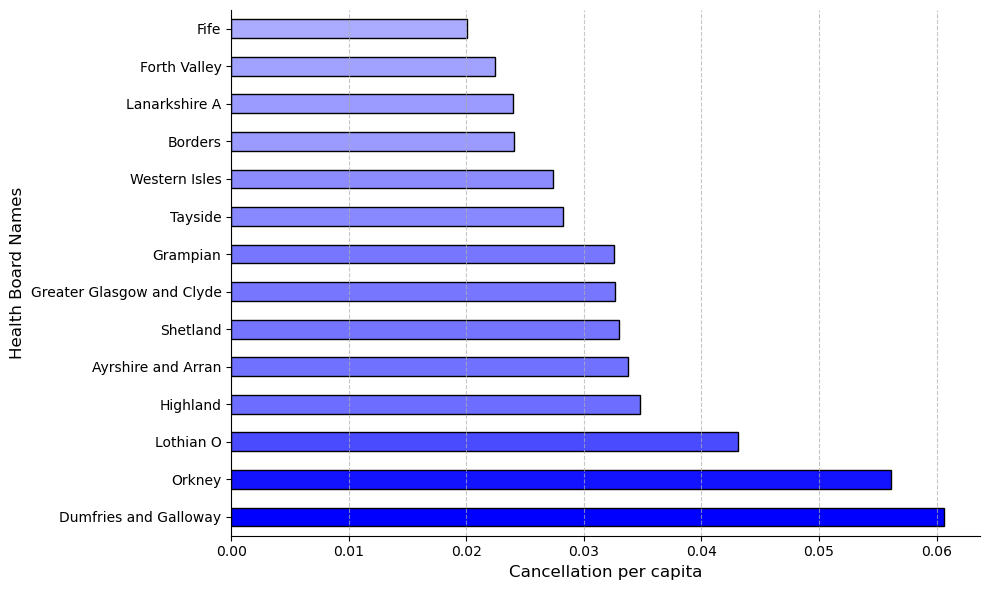

In [102]:
merged_namessum_sorted = merged_namessum.sort_values(by='Popu/can ratio')

base_color = (0, 0, 1, 0.3) 


max_value = merged_namessum_sorted['Popu/can ratio'].max()
colors = [(base_color[0], base_color[1], base_color[2], row['Popu/can ratio'] / max_value) for index, row in merged_namessum_sorted.iterrows()]

# Plotting the horizontal bar chart with specified colors and black outline
merged_namessum_sorted.plot(x="HBNames", y="Popu/can ratio", kind="barh", figsize=(10, 6), color=colors, legend=False, edgecolor='black')

# Adding title and labels

plt.xlabel('Cancellation per capita', fontsize=12)
plt.ylabel('Health Board Names', fontsize=12)

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust bar width
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.gca().spines['right'].set_visible(False)  # Remove right spine
plt.gca().spines['top'].set_visible(False)  # Remove top spine
plt.tight_layout()
plt.savefig('TotalCancellationsHealthBoard-ratio.pdf')

plt.show()


In [103]:
hb_geo.drop(columns=["HBCode"],inplace = True)
hb_geo.rename(columns={"HBName": "HBNames"}, inplace=True)
hb_geo

,HBNames,Shape_Leng,Shape_Area,geometry
0,Ayrshire and Arran,6.797823e+05,3.408802e+09,"MULTIPOLYGON (((201916.200 600444.404, 201918...."
1,Borders,5.254067e+05,4.742685e+09,"POLYGON ((345325.903 579663.303, 345325.104 57..."
2,Dumfries and Galloway,8.303012e+05,6.676315e+09,"MULTIPOLYGON (((266004.400 543544.601, 266010...."
3,Forth Valley,4.305683e+05,2.733659e+09,"POLYGON ((256533.002 740502.003, 256501.497 74..."
4,Grampian,8.028443e+05,8.800885e+09,"MULTIPOLYGON (((383521.198 771234.696, 383524...."
5,Highland,8.486538e+06,3.363704e+10,"MULTIPOLYGON (((173254.001 604986.004, 173258...."
6,Lothian,3.789231e+05,1.760804e+09,"MULTIPOLYGON (((313586.104 679560.597, 313614...."
7,Orkney,1.589228e+06,1.086211e+09,"MULTIPOLYGON (((347378.503 976721.996, 347387...."
8,Shetland,2.211514e+06,1.656618e+09,"MULTIPOLYGON (((419927.604 1069152.398, 419927..."
9,Western Isles,3.723205e+06,3.268473e+09,"MULTIPOLYGON (((55528.504 780719.001, 55556.50..."


In [104]:
graph1 = hb_geo.merge(names_sorted, on = "HBNames" )

In [105]:
graph1

,HBNames,Shape_Leng,Shape_Area,geometry,TotalCancelled,Initials
0,Ayrshire and Arran,6.797823e+05,3.408802e+09,"MULTIPOLYGON (((201916.200 600444.404, 201918....",15721,AAA
1,Borders,5.254067e+05,4.742685e+09,"POLYGON ((345325.903 579663.303, 345325.104 57...",3477,B
2,Dumfries and Galloway,8.303012e+05,6.676315e+09,"MULTIPOLYGON (((266004.400 543544.601, 266010....",12470,DAG
3,Forth Valley,4.305683e+05,2.733659e+09,"POLYGON ((256533.002 740502.003, 256501.497 74...",9021,FV
4,Grampian,8.028443e+05,8.800885e+09,"MULTIPOLYGON (((383521.198 771234.696, 383524....",24103,G
5,Highland,8.486538e+06,3.363704e+10,"MULTIPOLYGON (((173254.001 604986.004, 173258....",13865,H
6,Lothian,3.789231e+05,1.760804e+09,"MULTIPOLYGON (((313586.104 679560.597, 313614....",48812,L
7,Orkney,1.589228e+06,1.086211e+09,"MULTIPOLYGON (((347378.503 976721.996, 347387....",1976,O
8,Shetland,2.211514e+06,1.656618e+09,"MULTIPOLYGON (((419927.604 1069152.398, 419927...",1119,S
9,Western Isles,3.723205e+06,3.268473e+09,"MULTIPOLYGON (((55528.504 780719.001, 55556.50...",922,WI


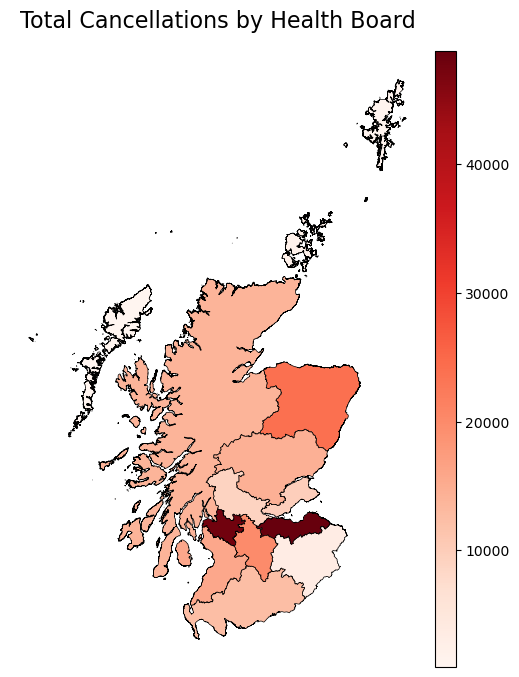

In [106]:
gdf = gpd.GeoDataFrame(graph1, geometry='geometry')

fig, ax = plt.subplots(figsize=(10, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

gdf.plot(column='TotalCancelled', cmap='Reds', legend=True, ax=ax, cax=cax, edgecolor='black', linewidth=0.5)  # Add edgecolor and linewidth parameters
ax.set_title('Total Cancellations by Health Board', fontsize=16)

# Remove axis lines and ticks
ax.axis('off')

# Adjust legend properties
legend = ax.get_legend()

plt.savefig('TotalChoro.png')
plt.show()

In [107]:
merged_namessum['HBNames'] = merged_namessum['HBNames'].replace('Lothian O', 'Lothian')
merged_namessum['HBNames'] = merged_namessum['HBNames'].replace('Lanarkshire A', 'Lanarkshire')
graph2 = hb_geo.merge(merged_namessum, on = "HBNames" )
graph2

,HBNames,Shape_Leng,Shape_Area,geometry,Popu/can ratio,Initials
0,Ayrshire and Arran,6.797823e+05,3.408802e+09,"MULTIPOLYGON (((201916.200 600444.404, 201918....",0.033761,AAA
1,Borders,5.254067e+05,4.742685e+09,"POLYGON ((345325.903 579663.303, 345325.104 57...",0.024080,B
2,Dumfries and Galloway,8.303012e+05,6.676315e+09,"MULTIPOLYGON (((266004.400 543544.601, 266010....",0.060663,DAG
3,Forth Valley,4.305683e+05,2.733659e+09,"POLYGON ((256533.002 740502.003, 256501.497 74...",0.022447,FV
4,Grampian,8.028443e+05,8.800885e+09,"MULTIPOLYGON (((383521.198 771234.696, 383524....",0.032547,G
5,Highland,8.486538e+06,3.363704e+10,"MULTIPOLYGON (((173254.001 604986.004, 173258....",0.034802,H
6,Lothian,3.789231e+05,1.760804e+09,"MULTIPOLYGON (((313586.104 679560.597, 313614....",0.043124,LO
7,Orkney,1.589228e+06,1.086211e+09,"MULTIPOLYGON (((347378.503 976721.996, 347387....",0.056123,O
8,Shetland,2.211514e+06,1.656618e+09,"MULTIPOLYGON (((419927.604 1069152.398, 419927...",0.032999,S
9,Western Isles,3.723205e+06,3.268473e+09,"MULTIPOLYGON (((55528.504 780719.001, 55556.50...",0.027361,WI


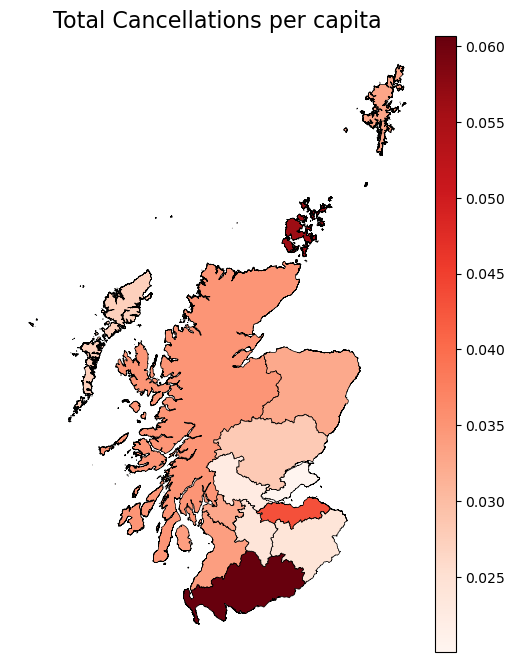

In [108]:
gdf = gpd.GeoDataFrame(graph2, geometry='geometry')


fig, ax = plt.subplots(figsize=(10, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

gdf.plot(column='Popu/can ratio', cmap='Reds', legend=True, ax=ax, cax=cax, edgecolor='black', linewidth=0.5)  # Add edgecolor and linewidth parameters
ax.set_title('Total Cancellations per capita', fontsize=16)

# Remove axis lines and ticks
ax.axis('off')

# Adjust legend properties
legend = ax.get_legend()

plt.savefig('Capita_can.png')
plt.show()

In [109]:
num_entries = len(population.columns)
print(num_entries)

98
